In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#charger les données
df = pd.read_csv("../data/profil_charge_tertiaire.csv")

#Convertir en datetime
df["datetime"] = pd.to_datetime(df["datetime"]) #Convertit la colonne datetime en format datetime de pandas

#Mettre la colonne datetime en index
df.set_index("datetime", inplace=True)

df.head()



,power_kW
datetime,
2023-01-01 00:00:00,49.202715
2023-01-01 01:00:00,56.509715
2023-01-01 02:00:00,66.060553
2023-01-01 03:00:00,69.014199
2023-01-01 04:00:00,8.946885


In [5]:
print("Nombre de lignes : ", len(df))
print("Valeur max :", df["power_kW"].max())
print("Valeur min :", df["power_kW"].min())
print("Moyenne :", df["power_kW"].mean())

Nombre de lignes :  8737
Valeur max : 539.4533257377914
Valeur min : 0.0
Moyenne : 251.02440160979035


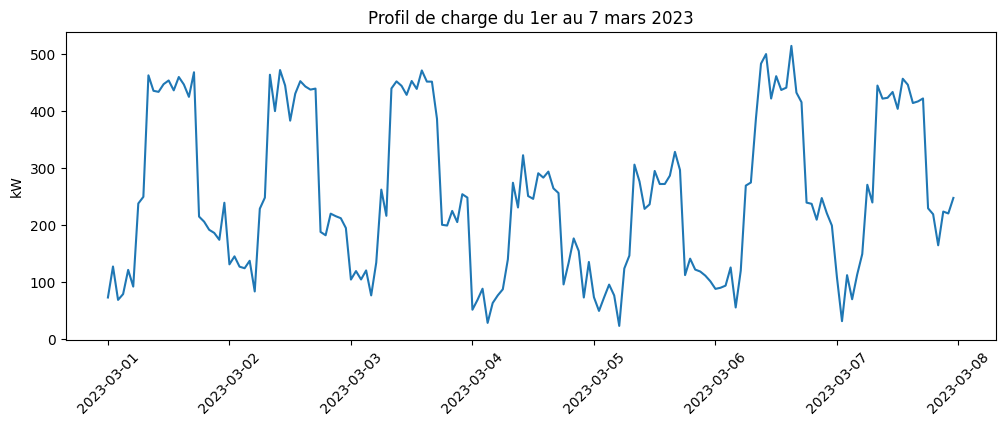

In [ ]:
df_week = df["2023-03-01":"2023-03-07"]
              
plt.figure(figsize=(12,4))
plt.plot(df_week.index, df_week["power_kW"])
plt.title("Profil de charge du 1er au 7 mars 2023")
plt.ylabel("kW")
plt.xticks (rotation=45) #Fait pivoter les dates pour une meilleure lisibilité
plt.show()

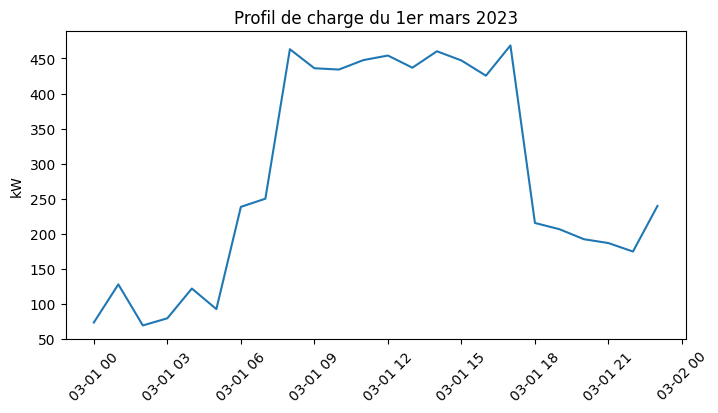

In [9]:
df_day = df.loc["2023-03-01"]

plt.figure(figsize=(8,4))
plt.plot(df_day.index, df_day["power_kW"])
plt.title("Profil de charge du 1er mars 2023")
plt.ylabel("kW")
plt.xticks (rotation=45)
plt.show()


In [11]:
peak_power = df["power_kW"].max()
mean_power = df["power_kW"].mean()
annual_energy = df["power_kW"].sum()  # Mesurer la consommation en kWh

load_factor = mean_power / peak_power # mesurer le facteur de charge

print(f"Pic de puissance : {peak_power:.1f} kW")
print(f"Puissance moyenne : {mean_power:.1f} kW")
print(f"Énergie annuelle : {annual_energy:.0f} kWh")
print(f"Facteur de charge : {load_factor:.2f}")

Pic de puissance : 539.5 kW
Puissance moyenne : 251.0 kW
Énergie annuelle : 2193200 kWh
Facteur de charge : 0.47


In [12]:
treshold = 0.8*peak_power
high_load_hours = df[df["power_kW"] > treshold]
print("Nombre d'heures > 80% du pic :", len(high_load_hours))

Nombre d'heures > 80% du pic : 1993
